## Flipkart Men's Shirt Data Analysis

Here are some important question that needs to be answered
- Which brands are dominating the flikart market
- What is average product price for each brand
- Which brands tends to have high rating but low cost
- which fit and patten is in trend

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [27]:
df = pd.read_csv("flipkart_data.csv")

In [28]:
df.shape

(1476, 8)

In [29]:
df.head()

,Brand,Product,Price,Rating,Total_ratings,Total_reviews,Fit,Pattern
0,Qugue,Men Regular Fit Printed Cut Away Collar Casual...,299,4.1,"2,225",130,Regular,Printed
1,Try This,Women Slim Fit Graphic Print Mandarin Collar C...,389,3.6,"8,396",289,Slim,Graphic
2,FUBAR,Men Slim Fit Striped Spread Collar Casual Shirt,279,3.8,"1,161",85,Slim,Striped
3,VeBNoR,Men Regular Fit Printed Spread Collar Casual S...,289,4.1,"10,783","1,010",Regular,Printed
4,Voroxy,Men Regular Fit Solid Spread Collar Casual Shirt,309,3.7,"22,948","1,996",Regular,Solid


In [30]:
print("Total duplicated values:", df.duplicated().sum())

Total duplicated values: 797


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
print("Total duplicated values:", df.duplicated().sum())

Total duplicated values: 0


In [33]:
df.isnull().sum()

Brand             1
Product           1
Price             2
Rating           42
Total_ratings    39
Total_reviews    39
Fit               1
Pattern           1
dtype: int64

In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

Brand            0
Product          0
Price            0
Rating           0
Total_ratings    0
Total_reviews    0
Fit              0
Pattern          0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637 entries, 0 to 1475
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          637 non-null    object 
 1   Product        637 non-null    object 
 2   Price          637 non-null    object 
 3   Rating         637 non-null    float64
 4   Total_ratings  637 non-null    object 
 5   Total_reviews  637 non-null    object 
 6   Fit            637 non-null    object 
 7   Pattern        637 non-null    object 
dtypes: float64(1), object(7)
memory usage: 44.8+ KB


In [37]:
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].astype(int)

df['Rating'] = df['Rating'].astype(int)

df['Total_ratings'] = df['Total_ratings'].str.replace(',', '')
df['Total_ratings'] = df['Total_ratings'].astype(int)

df['Total_reviews'] = df['Total_reviews'].str.replace(',', '')
df['Total_reviews'] = df['Total_reviews'].astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637 entries, 0 to 1475
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          637 non-null    object
 1   Product        637 non-null    object
 2   Price          637 non-null    int32 
 3   Rating         637 non-null    int32 
 4   Total_ratings  637 non-null    int32 
 5   Total_reviews  637 non-null    int32 
 6   Fit            637 non-null    object
 7   Pattern        637 non-null    object
dtypes: int32(4), object(4)
memory usage: 34.8+ KB


<Axes: xlabel='Price', ylabel='Density'>

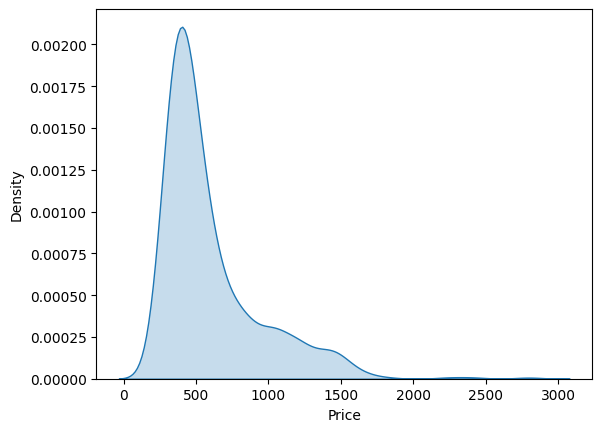

In [39]:
sns.kdeplot(df.Price, fill=True)

<Axes: xlabel='Rating', ylabel='Density'>

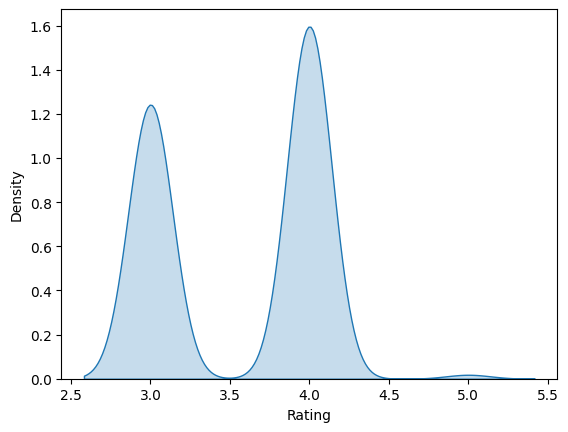

In [40]:
sns.kdeplot(df.Rating, fill=True)

<Axes: xlabel='Total_ratings', ylabel='Density'>

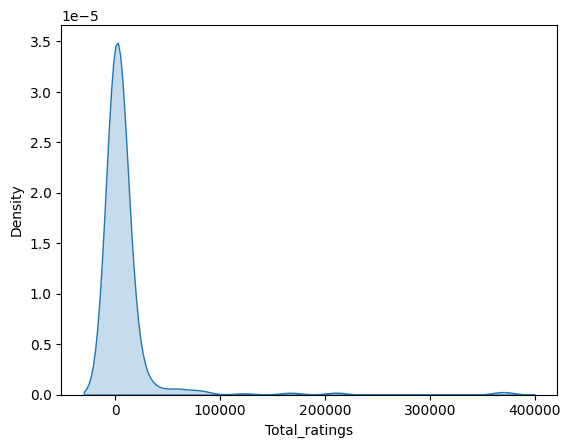

In [41]:
sns.kdeplot(df.Total_ratings, fill=True)

<Axes: xlabel='Total_reviews', ylabel='Density'>

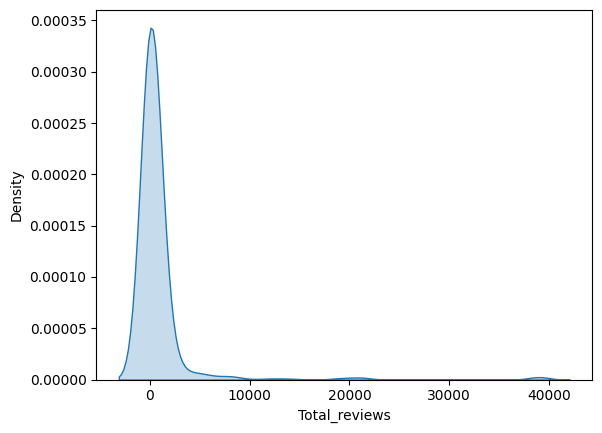

In [42]:
sns.kdeplot(df.Total_reviews, fill=True)

In [43]:
top_brands = df['Brand'].value_counts().nlargest(10).index

# Create a mask for top brands
top_brands_mask = df['Brand'].isin(top_brands)

# Assign labels
df.loc[~top_brands_mask, 'Brand'] = 'others'

In [44]:
brand_counts = df.Brand.value_counts()

In [45]:
fig = px.bar(x=brand_counts.index, y=brand_counts.values)
fig.update_xaxes(title_text='Brand')
fig.update_yaxes(title_text='Products')
fig.show()

<b>Highlander, US POLO ASSN. and Dennis Lingo are dominating the flipkart men's shirt page

In [46]:
avg_price = df.groupby("Brand").mean("Price")["Price"]
sorted_avg_price = avg_price.sort_values(ascending=False)
fig = px.bar(x=sorted_avg_price.index, y=sorted_avg_price.values)
fig.update_xaxes(title_text='Brand')
fig.update_yaxes(title_text='Avg Price')
fig.show()

In [47]:
avg_rating = df.groupby("Brand").mean("Rating")["Rating"]
sorted_avg_rating = avg_rating.sort_values(ascending=False)
fig = px.bar(x=sorted_avg_rating.index, y=sorted_avg_rating.values)
fig.update_xaxes(title_text='Brand')
fig.update_yaxes(title_text='Avg Rating')
fig.show()

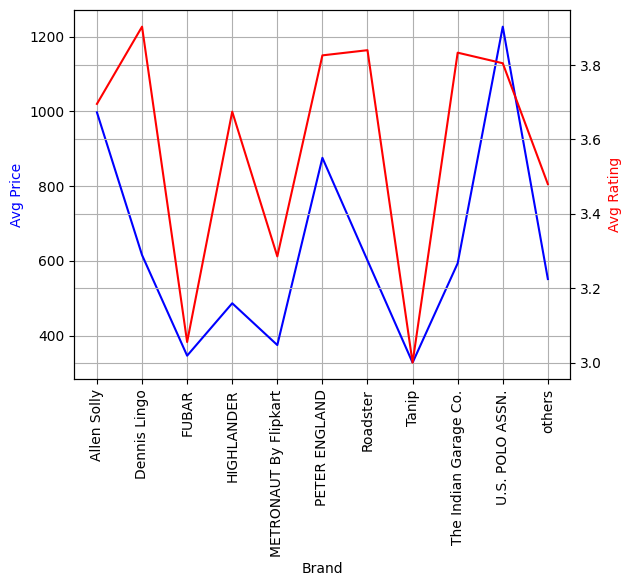

In [48]:
# Create the figure and axes
fig, ax1 = plt.subplots()

ax1.plot(avg_rating.index, avg_price.values, color='blue')
ax1.set_ylabel('Avg Price', color='blue')

ax2 = ax1.twinx()

# Plot the second dataset on the right y-axis
ax2.plot(avg_rating.index, avg_rating.values, color='red')
ax2.set_ylabel('Avg Rating', color='red')

ax1.set_xlabel('Brand')

ax1.tick_params(axis='x', rotation=90)
ax1.grid(True)
ax2.grid(True)
plt.show()

<b>Dennis Lingo and Roadster products have high ratings and low price

In [49]:
fit_count = df.groupby("Fit").count()["Brand"].sort_values(ascending=False)
fig = px.bar(x=fit_count.index, y=fit_count.values)
fig.update_xaxes(title_text='Fit')
fig.update_yaxes(title_text='Count')
fig.show()

<b>Slim fit shirts are domainting the market, followed by regular fit

In [50]:
pattern_count = df.groupby("Pattern").count()["Brand"].sort_values(ascending=False)
fig = px.bar(x=pattern_count.index, y=pattern_count.values)
fig.update_xaxes(title_text='Pattern')
fig.update_yaxes(title_text='Count')
fig.show()

<b>Solid pattern shirts are domainting the market, followed by checkered and printed shirts